In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# Function: reflect point P across line through Q and R
def reflect_point_across_line(P, Q, R):
    x0, y0 = P
    x1, y1 = Q
    x2, y2 = R
    
    # Line coefficients: a*x + b*y + c = 0
    a = y1 - y2
    b = x2 - x1
    c = x1*y2 - x2*y1
    
    # Reflection formula
    d = a*a + b*b
    x_ref = x0 - 2*a*(a*x0 + b*y0 + c)/d
    y_ref = y0 - 2*b*(a*x0 + b*y0 + c)/d
    
    return np.array([x_ref, y_ref])



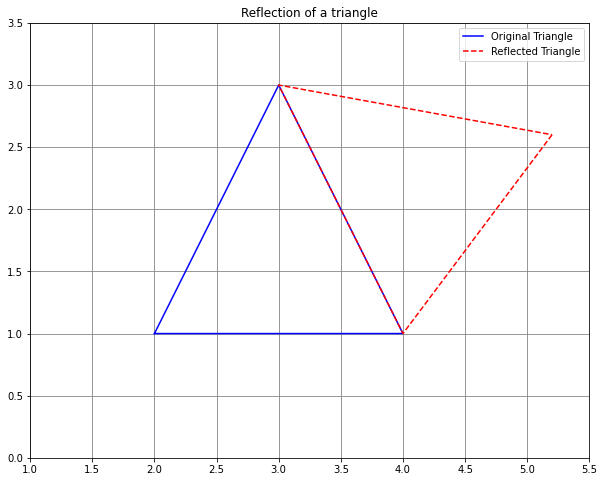

In [41]:
# Triangle vertices
A = np.array([2, 1])
B = np.array([4, 1])
C = np.array([3, 3])


# Reflect A across line BC
A_new = reflect_point_across_line(A, B, C)

plt.figure(figsize=(12, 8))
# Original triangle
plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], 'b-', label="Original Triangle")
# Reflected triangle
plt.plot([A_new[0], B[0], C[0], A_new[0]], [A_new[1], B[1], C[1], A_new[1]], 'r--', label="Reflected Triangle")

# Points
plt.xticks(np.arange(1, 6, 0.5))
plt.yticks(np.arange(0, 4, 0.5))
plt.legend()
plt.grid(color='grey')
plt.gca().set_aspect("equal", adjustable="box")
plt.title('Reflection of a triangle')
plt.show()




In [7]:
def f_square(x):
    return (x[0] - 9)**2 + (x[1] - 10)**2

In [48]:
def triangular_optimisation(n, alpha, Beta):
    
    rd_1 = np.random.randint(100)
    
    rd_2 = np.random.randint(100)
    
    
    A, B, C = np.array([rd_1, rd_2]), np.array([rd_1 + alpha, rd_2]), np.array([rd_1 + 0.5*alpha, rd_2 + Beta])
    
    candidates = [
    ("A", A, f_square(A)),
    ("B", B, f_square(B)),
    ("C", C, f_square(C))
    ]
    
    history = []
    
    for i in range(n):
        
        label_1, vec_1, value_1 = min(candidates, key=lambda x: x[2])
        new_candidates = [c for c in candidates if c[0] != label_1]
        label_2, vec_2, value_2 = min(new_candidates, key=lambda x: x[2])
        label_3, vec_3, value_3 = max(candidates, key=lambda x: x[2])
        
        D = reflect_point_across_line(vec_3, vec_2, vec_1)

        candidates = [
        ("A", vec_1, f_square(vec_1)),
        ("B", vec_2, f_square(vec_2)),
        ("C", D, f_square(D))
        ]
        
        history.append([vec_1.copy(), vec_2.copy(), D.copy()])
    optimal, optimal_vec, optimal_value = min(candidates, key=lambda x: x[2])
    
    return optimal_vec, optimal_value, history, vec_1, vec_2, D



optimal_vec, optimal_value, history, aa, bb, cc = triangular_optimisation(180, 2, 5)

print(f"Suboptimal value is: {optimal_value}, obtained at the point:{optimal_vec} othes:{aa, bb, cc}")




Suboptimal value is: 33.34407058555977, obtained at the point:[11.56412591 15.17390848] othes:(array([11.56412591, 15.17390848]), array([12.31788103, 17.02643465]), array([16.5723189 , 14.21578376]))


In [3]:
# Plot convergence of triangles
plt.figure(figsize=(12, 12))
for i, triangle in enumerate(history):
    tri = np.array(triangle + [triangle[0]])  # close the loop
    plt.plot(tri[:, 0], tri[:, 1], alpha=0.3, color="blue")

# Plot final triangle in red
final = np.array(history[-1] + [history[-1][0]])
plt.plot(final[:, 0], final[:, 1], 'r-', lw=2, label="Final Triangle")

plt.scatter(optimal_vec[0], optimal_vec[1], c="red", s=100, marker="x", label="Optimal Point")

# Generate contour data
x = np.linspace(-100, 100, 400)
y = np.linspace(-100, 100, 400)
X, Y = np.meshgrid(x, y)
Z = (X - 9)**2 + (Y - 10)**2  # <-- fixed

# Draw contours of f_square
contours = plt.contour(X, Y, Z, levels=40, cmap="viridis")
plt.clabel(contours, inline=True, fontsize=8)

# Add labels and style
plt.xlabel("x")
plt.ylabel("y")
plt.title("Triangular Optimisation Convergence")
plt.legend()
plt.gca().set_aspect("equal", "box")
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.grid(True)
plt.show()

NameError: name 'history' is not defined

<Figure size 864x864 with 0 Axes>

****Adaptative methods****

Randomness

In [141]:
# Function: reflect point P across line through Q and R
def adaptative_reflect_point_across_line(P, Q, R, phi_1, phi_2):
    x0, y0 = P
    x1, y1 = Q
    x2, y2 = R
    
    # Line coefficients: a*x + b*y + c = 0
    a = y1 - y2
    b = x2 - x1
    c = x1*y2 - x2*y1
    
    # Reflection formula
    d = a*a + b*b
    x_ref = x0 - (2*a*(a*x0 + b*y0 + c)/d) + phi_1
    y_ref = y0 - (2*b*(a*x0 + b*y0 + c)/d) + phi_2
    
    return np.array([x_ref, y_ref])

In [166]:
np.random.seed(4)

def adaptative_triangular_optimisation(n, alpha, Beta):
    
    rd_1 = np.random.randint(1000)
    
    rd_2 = np.random.randint(1000)
    
    
    A, B, C = np.array([rd_1, rd_2]), np.array([rd_1 + alpha, rd_2]), np.array([rd_1 + 0.5*alpha, rd_2 + Beta])
    
    candidates = [
    ("A", A, f_square(A)),
    ("B", B, f_square(B)),
    ("C", C, f_square(C))
    ]
    
    history = []
    zz = 0
    
    for i in range(n):
        
        label_1, vec_1, value_1 = min(candidates, key=lambda x: x[2])
        new_candidates = [c for c in candidates if c[0] != label_1]
        label_2, vec_2, value_2 = min(new_candidates, key=lambda x: x[2])
        label_3, vec_3, value_3 = max(candidates, key=lambda x: x[2])
        
        ratee = value_3/value_1
        phi_1 = min(max(np.random.normal(0, 0.1), 0),0.001) + 0.0001*ratee #random rate
        phi_2 = min(max(np.random.normal(1, 0.5), 0),0.001) + 0.0001*ratee #random rate
        
        zz += 0.01
        #phi = ratee/(1+zz)
        
        D = adaptative_reflect_point_across_line(vec_3, vec_2, vec_1, phi_1, phi_2)

        candidates = [
        ("A", vec_1, f_square(vec_1)),
        ("B", vec_2, f_square(vec_2)),
        ("C", D, f_square(D))
        ]
        
        history.append([vec_1.copy(), vec_2.copy(), D.copy()])
        
    optimal, optimal_vec, optimal_value = min(candidates, key=lambda x: x[2])
    
    return optimal_vec, optimal_value, history, vec_1, vec_2, D



optimal_vec, optimal_value, history, aa, bb, cc = adaptative_triangular_optimisation(100, 5, 7)

print(f"Suboptimal value is: {optimal_value}, obtained at the point:{optimal_vec} othes:{aa, bb, cc}")


Suboptimal value is: 3.871613155552783, obtained at the point:[10.81745497 10.75396987] othes:(array([10.81745497, 10.75396987]), array([14.54505385, 14.00594629]), array([17.3159687,  7.1683898]))


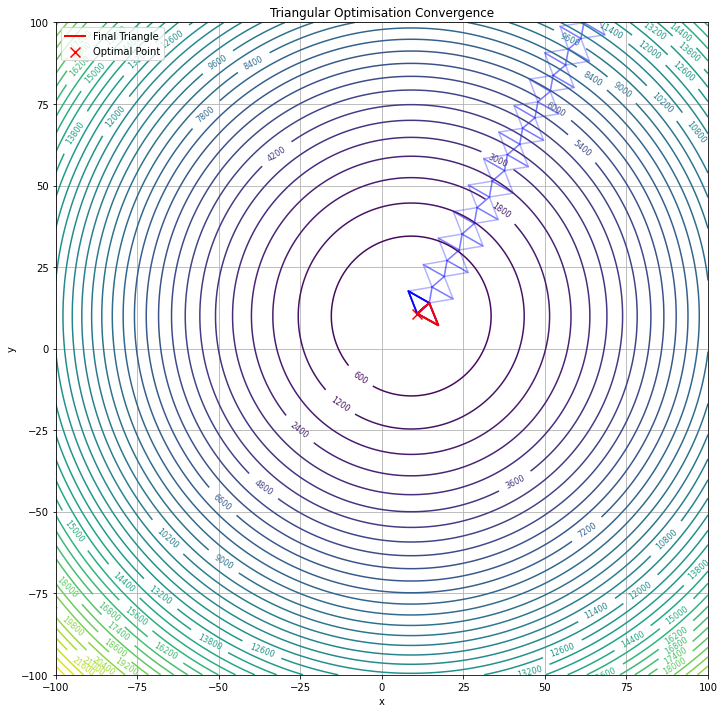

In [167]:
# Plot convergence of triangles
plt.figure(figsize=(12, 12))
for i, triangle in enumerate(history):
    tri = np.array(triangle + [triangle[0]])  # close the loop
    plt.plot(tri[:, 0], tri[:, 1], alpha=0.3, color="blue")

# Plot final triangle in red
final = np.array(history[-1] + [history[-1][0]])
plt.plot(final[:, 0], final[:, 1], 'r-', lw=2, label="Final Triangle")

plt.scatter(optimal_vec[0], optimal_vec[1], c="red", s=100, marker="x", label="Optimal Point")

# Generate contour data
x = np.linspace(-100, 100, 400)
y = np.linspace(-100, 100, 400)
X, Y = np.meshgrid(x, y)
Z = (X - 9)**2 + (Y - 10)**2  # <-- fixed

# Draw contours of f_square
contours = plt.contour(X, Y, Z, levels=40, cmap="viridis")
plt.clabel(contours, inline=True, fontsize=8)

# Add labels and style
plt.xlabel("x")
plt.ylabel("y")
plt.title("Triangular Optimisation Convergence")
plt.legend()
plt.gca().set_aspect("equal", "box")
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.grid(True)
plt.show()

Change size

In [56]:
# Function: reflect point P across line through Q and R
def adaptative_reflect_point_across_line(P, Q, R, phi_1, phi_2):
    x0, y0 = P
    x1, y1 = Q
    x2, y2 = R
    
    uk = np.random.randint(0, 1)* np.random.randint(0, 1)
    
    y_delta = (y2 - y1)*phi_1*0.001*uk
    x_delta = (x2 - x1)*phi_2*0.001*uk
    
    Q = np.array([x1 - x_delta, y1 - y_delta])
    R = np.array([x2 + x_delta, y2 + y_delta])
    
    x1, y1 = Q
    x2, y2 = R
    
    # Line coefficients: a*x + b*y + c = 0
    a = y1 - y2
    b = x2 - x1
    c = x1*y2 - x2*y1
    
    # Reflection formula
    d = a*a + b*b
    x_ref = x0 - (2*a*(a*x0 + b*y0 + c)/d)*phi_1*0.001
    y_ref = y0 - (2*b*(a*x0 + b*y0 + c)/d)*phi_2*0.001
    
    y_delta = (y2 - y1)*phi_1
    x_delta = (x2 - x1)*phi_2
    
    Q = np.array([x1 - x_delta, y1 - y_delta])
    R = np.array([x2 + x_delta, y2 + y_delta])
    
    return np.array([x_ref, y_ref]), R, Q

In [57]:
def adaptative_triangular_optimisation(n, alpha, Beta):
    
    rd_1 = np.random.randint(1000)
    
    rd_2 = np.random.randint(1000)
    
    
    A, B, C = np.array([rd_1, rd_2]), np.array([rd_1 + alpha, rd_2]), np.array([rd_1 + 0.5*alpha, rd_2 + Beta])
    
    candidates = [
    ("A", A, f_square(A)),
    ("B", B, f_square(B)),
    ("C", C, f_square(C))
    ]
    
    history = []
    zz = 0
    
    for i in range(n):
        
        label_1, vec_1, value_1 = min(candidates, key=lambda x: x[2])
        new_candidates = [c for c in candidates if c[0] != label_1]
        label_2, vec_2, value_2 = min(new_candidates, key=lambda x: x[2])
        label_3, vec_3, value_3 = max(candidates, key=lambda x: x[2])
        
        ratee = value_3/value_1
        phi_1 = 0.01*ratee #random rate
        phi_2 = 0.01*ratee #random rate
        
        zz += 0.01
        #phi = ratee/(1+zz)
        
        D, vec_1, vec_2 = adaptative_reflect_point_across_line(vec_3, vec_2, vec_1, phi_1, phi_2)
         
        
        candidates = [
        ("A", vec_1, f_square(vec_1)),
        ("B", vec_2, f_square(vec_2)),
        ("C", D, f_square(D))
        ]
        
        history.append([vec_1.copy(), vec_2.copy(), D.copy()])
        
    optimal, optimal_vec, optimal_value = min(candidates, key=lambda x: x[2])
    
    return optimal_vec, optimal_value, history, vec_1, vec_2, D



optimal_vec, optimal_value, history, aa, bb, cc = adaptative_triangular_optimisation(100, 50, 70)

print(f"Suboptimal value is: {optimal_value}, obtained at the point:{optimal_vec} othes:{aa, bb, cc}")

Suboptimal value is: 399225.03806546365, obtained at the point:[ 613.67449186 -173.28610683] othes:(array([ 613.67449186, -173.28610683]), array([842.75896217, 269.29232696]), array([871.55115078, 111.94577055]))


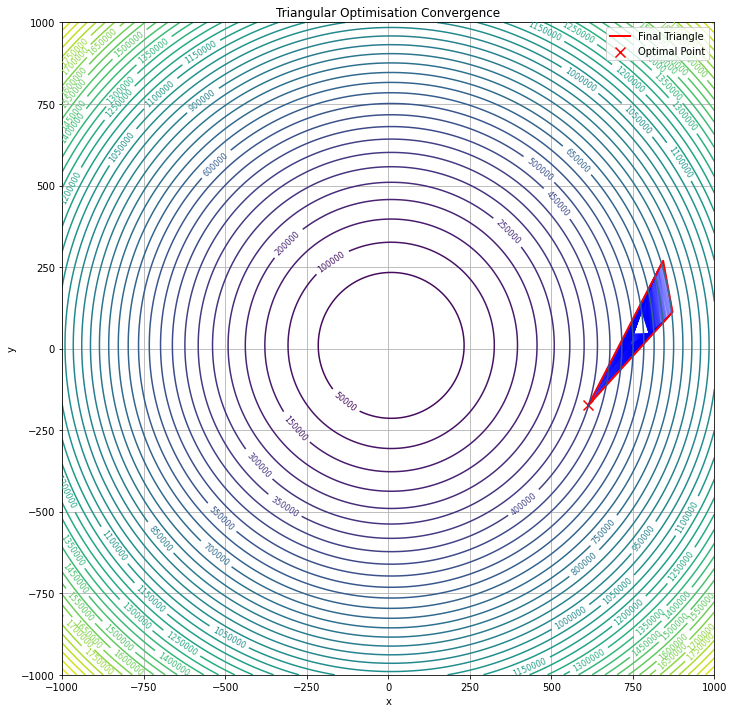

In [58]:
# Plot convergence of triangles
plt.figure(figsize=(12, 12))
for i, triangle in enumerate(history):
    tri = np.array(triangle + [triangle[0]])  # close the loop
    plt.plot(tri[:, 0], tri[:, 1], alpha=0.3, color="blue")

# Plot final triangle in red
final = np.array(history[-1] + [history[-1][0]])
plt.plot(final[:, 0], final[:, 1], 'r-', lw=2, label="Final Triangle")

plt.scatter(optimal_vec[0], optimal_vec[1], c="red", s=100, marker="x", label="Optimal Point")

# Generate contour data
x = np.linspace(-1000, 1000, 400)
y = np.linspace(-1000, 1000, 400)
X, Y = np.meshgrid(x, y)
Z = (X - 9)**2 + (Y - 10)**2  # <-- fixed

# Draw contours of f_square
contours = plt.contour(X, Y, Z, levels=40, cmap="viridis")
plt.clabel(contours, inline=True, fontsize=8)

# Add labels and style
plt.xlabel("x")
plt.ylabel("y")
plt.title("Triangular Optimisation Convergence")
plt.legend()
plt.gca().set_aspect("equal", "box")
plt.xlim(-1000, 1000)
plt.ylim(-1000, 1000)
plt.grid(True)
plt.show()